# Task

Build a machine learning model that will identify customers that are eligible for loan or not.


In [1]:
#Load the dataset and the necessary Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/Visacheck Admin/Downloads/loan_data_set.csv')

# Check the first few rows of the dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Investigating the dataset

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation

we have three major types of columns in the dataset
Categorical Columns: Gender (Male/Female), Married (Yes/No), Number of dependents (Possible values:0,1,2,3+), Education (Graduate / Not Graduate), Self-Employed (No/Yes), credit history(Yes/No), Property Area (Rural/Semi Urban/Urban) and Loan Status (Y/N)(Target variable)

Numerical Columns: Loan ID, Applicant Income , Co-applicant Income, Loan amount and Loan amount term

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

# Exploratory Data Analysis

In [7]:
#drop unwanted columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
#checking for missing value
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Imputing Missing values with mean or median for Numerical variables
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

In [14]:
# Check the distribution of the target variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
# Check the distribution of the target variable
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

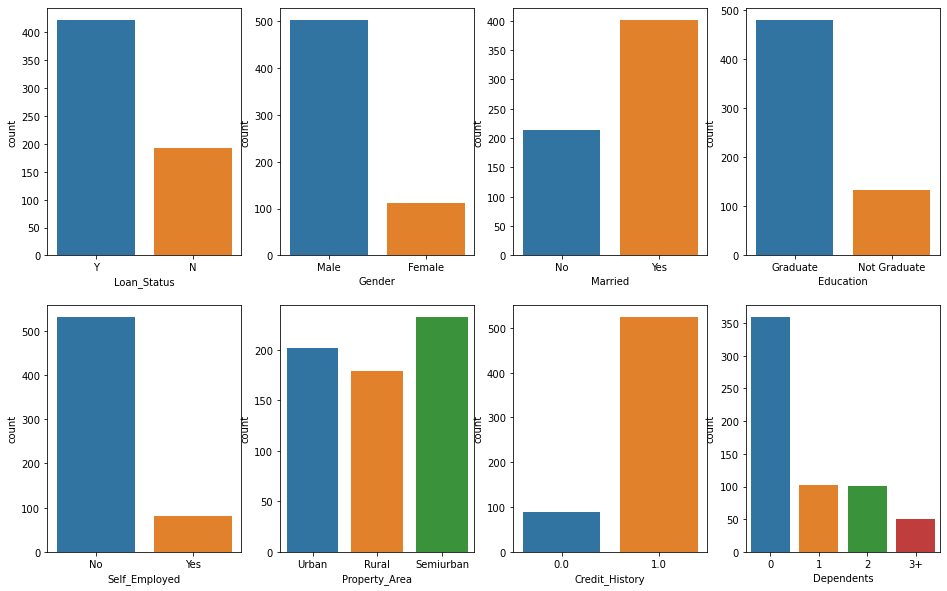

In [22]:
# check the distribution of the variables

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=df,ax=ax[0][0])
sns.countplot('Gender',data=df,ax=ax[0][1])
sns.countplot('Married',data=df,ax=ax[0][2])
sns.countplot('Education',data=df,ax=ax[0][3])
sns.countplot('Self_Employed',data=df,ax=ax[1][0])
sns.countplot('Property_Area',data=df,ax=ax[1][1])
sns.countplot('Credit_History',data=df,ax=ax[1][2])
sns.countplot('Dependents',data=df,ax=ax[1][3])

Observation


1. This shows that loan of 422(around 69%) people out of 614 were approved.
2. 80% of applicants in the dataset are male.
3. 65% of the applicants in the dataset are married.
4. 15% of applicants in the dataset are self-employed.
5. 85% of applicants are debt free.
6. Most of the applicants don't have any dependents.
7. Around 80% of the applicants are Graduate.
8. Most of the applicants are from the Semiurban area.
9. most of the data in the distribution of applicant income are towards the left which means it is not normally     distributed.The boxplot confirms the presence of a lot of outliers/extreme values.
10. There are a higher number of graduates with very high incomes, which are appearing to be outliers.
11. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

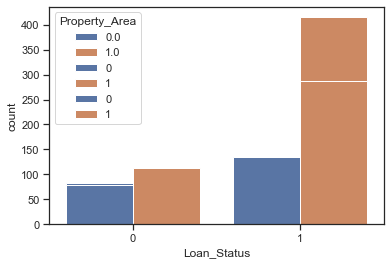

In [45]:
# Visualize the relationships between some variables

sns.countplot(x='Loan_Status', hue='Credit_History', data=df)
sns.countplot(x='Loan_Status', hue='Education', data=df)
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)

# Data preprocessing:

In [43]:
# Convert categorical variables into dummy variables

#Loan_Status feature boolean values, So we replace Y values with 1 and N values with 0 and 
#same for other Boolean types of columns

df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})
 
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

df.Married = df.Married.replace({"Yes": 1, "No" : 0})

df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

df.Education = df.Married.replace({"Grduate": 1, "Not Graduate" : 0})

df.Property_Area = df.Married.replace({"Urban": 2, "Rural" : 1, "Semiurban" :0})

df.Dependents = df.Dependents.replace({"0": 1, "1" : 0, "3+": 2})

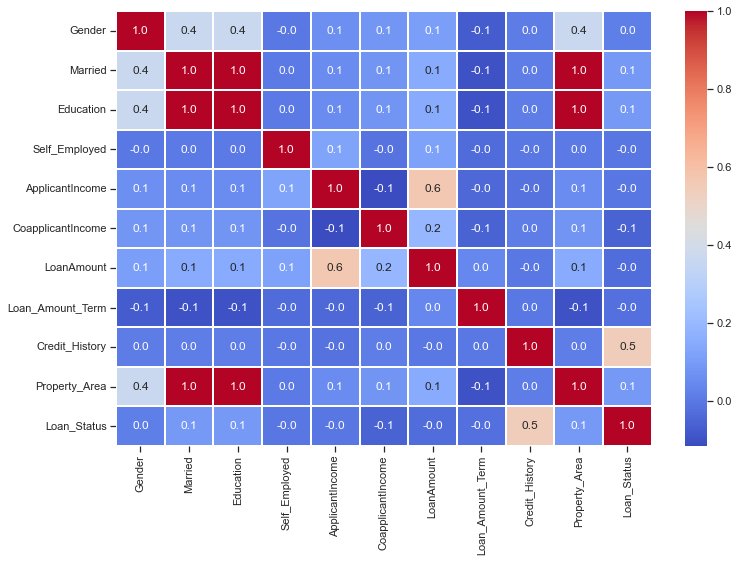

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [46]:
# Separate the target variable from the predictors
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Create a pipeline for preprocessing and model fitting
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('scaler', StandardScaler()), ('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf_classifier', RandomForestClassifier(random_state=42))])
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

In [50]:
# Fit each pipeline and get accuracy scores on test set
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pipeline = pipeline
        best_classifier = pipelines.index(pipeline)

print(f"The best classifier is {best_pipeline.named_steps['lr_classifier']} with an accuracy score of {best_accuracy:.2f}")

The best classifier is LogisticRegression(random_state=42) with an accuracy score of 0.78


# Evaluate the model and tune hyperparameters

In [51]:
# Evaluate the model on the training set
y_train_pred = best_pipeline.predict(X_train)
print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test set
y_test_pred = best_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))

# Check for overfit

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



# Conclusion

The best classifier is LogisticRegression with an accuracy score of 0.78
The accuracy score after fine tunning is 82%
We also see that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome.